# Visualização dos dados de vacinação

## Tratamento dos Dados

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

In [2]:
vax_df = pd.read_csv("datasets/dados_vacinacao.csv")
casos_df = pd.read_csv('datasets/dados_pb.csv')

Renomeremos as categorias de vacina e adescrição do tipo de dose para facilitar a leitura e remoção de duplicidade de códigos para o mesmo fabricante e mesmo tipo de dose. 

In [3]:
vax_df.loc[(vax_df.vacina_nome == 'COVID-19 ASTRAZENECA - ChAdOx1-S') | (vax_df.vacina_nome == 'COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD'), 'vacina_nome'] = 'ASTRAZENECA'
vax_df.loc[(vax_df.vacina_nome == 'COVID-19 SINOVAC/BUTANTAN - CORONAVAC') | (vax_df.vacina_nome == 'COVID-19 SINOVAC - CORONAVAC'), 'vacina_nome'] = 'CORONAVAC'
vax_df.loc[vax_df.vacina_nome == 'COVID-19 JANSSEN - Ad26.COV2.S', 'vacina_nome'] = 'JANSEN'
vax_df.loc[vax_df.vacina_nome == 'COVID-19 PFIZER - COMIRNATY', 'vacina_nome'] = 'PFIZER'
vax_df.loc[vax_df.vacina_nome == 'COVID-19 PEDIÁTRICA - PFIZER COMIRNATY', 'vacina_nome'] = 'PFIZER PEDIÁTRICA'

vax_df.loc[vax_df.vacina_codigo == 89, 'vacina_codigo'] = 85
vax_df.loc[vax_df.vacina_codigo == 98, 'vacina_codigo'] = 86

vax_df.loc[vax_df.vacina_descricao_dose	 == 'Reforço', 'vacina_descricao_dose'] = '3ª Dose'
vax_df.loc[vax_df.vacina_descricao_dose	 == 'Dose', 'vacina_descricao_dose'] = 'Dose única'
vax_df.loc[vax_df.vacina_descricao_dose	 == 'Dose Adicional', 'vacina_descricao_dose'] = '4ª Dose'
vax_df.loc[vax_df.vacina_descricao_dose	 == '2º Reforço', 'vacina_descricao_dose'] = '4ª Dose'
vax_df.loc[vax_df.vacina_descricao_dose	 == 'Dose Inicial', 'vacina_descricao_dose'] = '1ª Dose'
vax_df.loc[vax_df.vacina_descricao_dose	 == '2ª Dose Revacinação', 'vacina_descricao_dose'] = '2ª Dose'
vax_df.loc[vax_df.vacina_descricao_dose	 == 'Única', 'vacina_descricao_dose'] = 'Dose única'

In [4]:
vax_df.head(5)

,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_nmMunicipio,paciente_endereco_cep,estabelecimento_municipio_nome,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_dataAplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,paciente_id
0,44,1977-04-18,M,1,BRANCA,ARAPIRACA,57510,PATOS,912,Médico,9,Trabalhadores de Saúde,2021-11-11,3ª Dose,87,PFIZER,f9495cb04daf5adb495d22c9c88b31883f191fb762ab27...
1,5,2016-11-18,M,1,BRANCA,PARELHAS,None,CAMPINA GRANDE,207,Pessoas de 5 a 11 anos,0,NaN,2022-02-07,1ª Dose,99,PFIZER PEDIÁTRICA,52288faace8c986872faca7101868ae8a23fefd435cd51...
2,39,1982-01-23,F,99,SEM INFORMACAO,CAMPINA GRANDE,58410,CAMPINA GRANDE,201,Pessoas de 18 a 64 anos,2,Faixa Etária,2021-07-16,1ª Dose,85,ASTRAZENECA,0ffaed327aac7fe8abf0b35471b0b1fa60f9fc48ff7d9c...
3,33,1988-07-20,M,2,PRETA,BAYEUX,58110,BAYEUX,201,Pessoas de 18 a 64 anos,2,Faixa Etária,2021-07-23,1ª Dose,85,ASTRAZENECA,fe78cee14dce3436024728b1d760439861021207a32712...
4,27,1994-03-22,M,3,PARDA,JOAO PESSOA,58058,JOAO PESSOA,201,Pessoas de 18 a 64 anos,2,Faixa Etária,2021-12-07,2ª Dose,87,PFIZER,470944c18359d6a1fea2a53194d29bfdb7ce1d21b47979...


## Visualização dos dados:

### Vacinação por tipo de dose

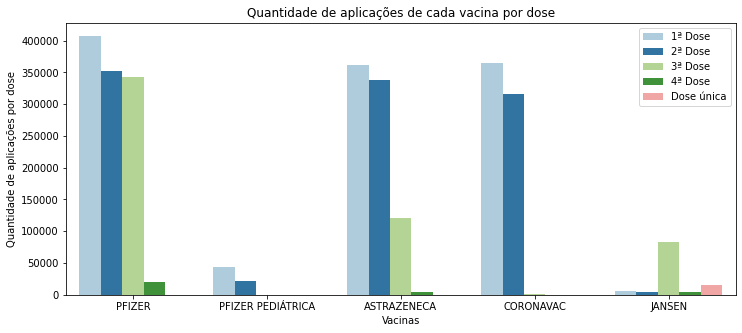

In [5]:
bar = sns.countplot(data=vax_df, x='vacina_nome', hue='vacina_descricao_dose', hue_order=['1ª Dose', '2ª Dose', '3ª Dose', '4ª Dose', 'Dose única'], palette='Paired')
bar.set_xlabel('Vacinas')
bar.set_ylabel('Quantidade de aplicações por dose')
bar.set_title('Quantidade de aplicações de cada vacina por dose')
bar.figure.set_size_inches(12, 5)
plt.legend(loc = 'upper right')

Verificamos pelo gráfico que a vacina mais aplicada na Paraíba durante o período analisado foi a Pfizer, para a primeira dose, segunda e terceira doses. Tal observação contrasta com o cenário nacional, tendo em vista que a vacina mais utilizada no país durante a campanha de COVID-19 foi a Astrazeneca, segundo dados do Ministério da Saúde (https://www.gov.br/saude/pt-br/assuntos/noticias/2022/janeiro/saiba-a-quantidade-de-doses-de-vacinas-covid-19-aplicadas-ate-o-momento-no-brasil-por-fabricante#:~:text=E%20tem%20mais%20not%C3%ADcia%20boa,milh%C3%B5es%20foram%20produzidas%20pela%20Janssen).

Notamos também que a vacina Jansen foi mais aplicada como terceira dose do que como dose única. Já a Coronavac praticamente não foi usada além da segunda dose.

### Vacinação por etnia

In [6]:
vax_df['paciente_racaCor_valor'].value_counts()

PARDA             1040425
BRANCA             664898
AMARELA            593652
SEM INFORMACAO     391266
PRETA              105218
INDIGENA            11331
Name: paciente_racaCor_valor, dtype: int64

In [12]:
ethinicities_vax_list = ['Amarela', 'Branca', 'Parda', 'Preta', 'Sem informação', 'Indígena']
ethinicities_vax_value_counts_list = [593652, 664898, 1040425, 105218, 391266, 11331]

fig = go.Figure(data=[go.Pie(labels = ethinicities_vax_list, values = ethinicities_vax_value_counts_list, hole=.3)])
fig.update_layout(title = 'Vacinação por etnia na Paraíba')
fig.show()

O primeiro gráfico acima mostra a porcentagem de doses da vacina contra a Covid-19 aplicadas para cada grupo étnico. Ele lida com o número absoluto de vacinações, isto é, cada dose, independente da classificação (1ª dose, dose de reforço, etc) ou do fabricante, contará na frequência de vacinação. Desse modo, percebemos que, de acordo com os dados, a maioria dos vacinados na Paraíba se autodeclaram pardos, seguidos dos autodeclarados brancos, e amarelos.

In [13]:
ethinicities_pop_list = ['Indigena ou Amarela', 'Branca', 'Parda', 'Preta']
ethinicities_pop_percentages_list = [1.8, 39.8, 52.7, 5.7]

fig = go.Figure(data=[go.Pie(labels = ethinicities_pop_list,
                            values=ethinicities_pop_percentages_list, hole=.3)])
fig.update_layout(title = "Distribuição populacional da Paraíba por etnia")
fig.show()

O gráfico acima representa a distribição populacional da Paraíba entre os diferentes grupo étnicos, de acordo com dados de 2010 do IBGE. 

Comparando ambos os gráficos, observamos uma anomalia nos dados: a população amarela (asiática) recebeu cerca de um quinto das doses da vacina aplicadas no Estado, porém menos de 2% da população paraibana é amarela.

### Vacinação por faixa etária

aqui entra a piramide etária de Henrique

In [9]:
# sns.violinplot(data = vax_df, y = "paciente_idade", hue = "paciente_enumSexoBiologico", palette = "Set2", split=True, orient='v')

In [10]:
# sns.histplot(data = vax_df, y = "paciente_idade", palette = "bright", stat = "count", hue = "paciente_enumSexoBiologico", binwidth = 4, binrange = (0, 115))

### Vacinação por sexo

In [11]:
vax_df[vax_df.paciente_enumSexoBiologico != 'I']['paciente_enumSexoBiologico'].value_counts()

F    1506616
M    1300158
Name: paciente_enumSexoBiologico, dtype: int64

In [14]:
sex_list = ["M", "F"]
sex_pop_list = [1824379, 1942149]
sex_vax_list = [1300158, 1506616]
sex_colors = ['#84d74d', '#4d7aff']

fig = go.Figure(data=[go.Pie(labels = sex_list, values = sex_pop_list, hole=.3)])
fig.update_layout(title = "Distribuição populacional da Paraíba por sexo")
fig.show()

O gráfico acima mostra a distribuição populacional da Paraíba por sexo, com dados do censo 2010 do IBGE.

In [15]:
fig = go.Figure(data=[go.Pie(labels = sex_list, values = sex_vax_list, hole=.3)])
fig.update_layout(title = "Vacinação na Paraíba por sexo")
fig.show()

O gráfico acima mostra a quantidade de vacinas aplicadas para cada sexo na Paraíba.

Observamos que, dentro de uma margem de erro plausível, homens e mulheres vacinaram-se dentro das proporsões esperadas. 

Devemos levar em conta, para as análises de vacinação por etnia, idade e sexo, que os dados demográficos mais atuais que temos são do censo 2010 do IBGE, e que a configuração demográfica paraibana pode ter mudado bastante nesses 12 anos que passaram.